# The Sparks Foundation - GRIP Mar. 2021

## Task 1 - Prediction using Supervised ML
### Predict the percentage of an student based on the no. of study hours.

### Author : Mohit Kumar

In [1]:
#import all libraries required in this project first
import matplotlib.pyplot as plt
import pandas as pd
import numpy as npb

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [3]:
#import dataset from the given link
data_url = "http://bit.ly/w-data"
dataset = pd.read_csv(data_url)
dataset.head() #head fetch the top 5 rows of dataset by default ,you can also give some value inside

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print('Shape of our data : ',dataset.shape)
print('\nDescription of Data :\n',dataset.describe())

Shape of our data :  (25, 2)

Description of Data :
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


### * Plotting of data

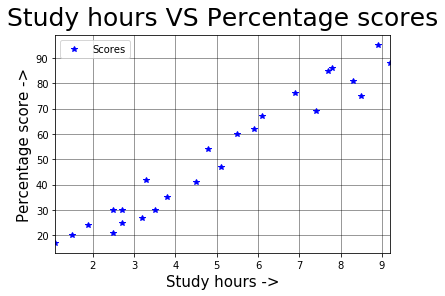

In [5]:
#first we plot our data which helps us to find some relationship between data

dataset.plot(x='Hours',y='Scores',style='*',color='blue')
plt.grid(alpha=0.5,color='black') #alpha is for opacity 
plt.title("Study hours VS Percentage scores" ,fontsize =25,pad=10) 
plt.xlabel("Study hours ->",size=15)
plt.ylabel("Percentage score ->",size=15)
plt.show()

### * Partition of data

In [6]:
#now before training first separate our data in which we have to find relationship that is between inputs and outputs
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:,1].values

### * Training , Testing & Spliting

In [7]:
#now the library Sklearn we import in beginning have a functio called train_test_split which split the data in two subsets : training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [8]:
#here ,with the help of Linear Regression() train our data
#basically,Linear regression is an approach for building relationship between a dependent variable with a given set of independent variables.

regressor = LinearRegression()
regressor.fit(X_train,Y_train)
print("Training Successfull.")

Training Successfull.


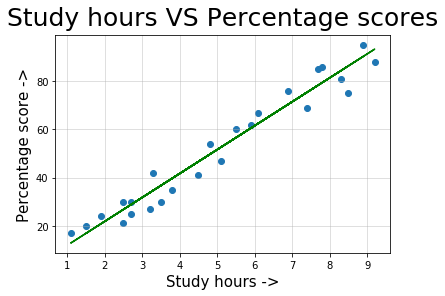

In [9]:
#add regression line to our graph gives us better understanding
reg_line = regressor.coef_*X+regressor.intercept_

plt.grid(alpha=0.5)
plt.title("Study hours VS Percentage scores" ,fontsize =25,pad=10)
plt.xlabel("Study hours ->",size=15)
plt.ylabel("Percentage score ->",size=15)
plt.scatter(X,Y)
plt.plot(X,reg_line,color='green')
plt.show()

### * Prediction 

In [10]:
#now make some predictions based on the algo we trained 

print(X_test)
Y_pred = regressor.predict(X_test)
print("\nY_pred :", Y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]

Y_pred : [16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


###### understand upper cell's output like after training our algorithm we give X_test values(hours study) and the prediction of output based on X_test is percentage a student will get after study for this much time.

### * Comparison between actual and predicted values

   Actual  Predicted
0      20  16.844722
1      27  33.745575
2      69  75.500624
3      30  26.786400
4      62  60.588106
5      35  39.710582
6      24  20.821393


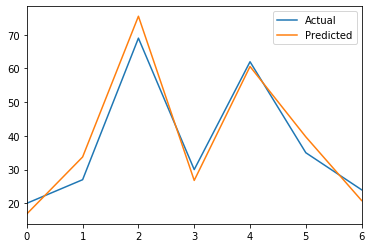

In [11]:
# now checks the acuracy of our algo that we train ,by watching the differece between actual and predicted values(scores)
# we use DataFrame -a 2D labelled data structure(rows and columns)
df = pd.DataFrame({'Actual' : Y_test,'Predicted': Y_pred})
print(df)
df.plot()

### Ques : What will be predicted score if a student studies for 9.25 hrs/ day?

In [12]:
ques = float(input("Enter no.of hours a student study :"))
predict_ans = regressor.predict([[ques]])
print("No. of hours a student study = {}" .format(ques))
print("Predicted Score of that student = {}".format(predict_ans[0]))

Enter no.of hours a student study :9.25
No. of hours a student study = 9.25
Predicted Score of that student = 93.89272889341655


### Performance of our model

In [15]:
#find the mean_absolute_error of our model to evaluate the performance of our model by metrics from Sklearn library that we import

abs_error = metrics.mean_absolute_error(Y_test ,Y_pred)
print("Mean Absolute Error :",abs_error)

Mean Absolute Error : 4.130879918502486
